# Riddler Classic: Vexing Vexillology
Posted by FiveThirtyEight on January 3, 2020
>
>The New York Times recently launched some new word puzzles, one of which is Spelling Bee. In this game, seven letters are >arranged in a honeycomb lattice, with one letter in the center. Here’s the lattice from December 24, 2019:
>
>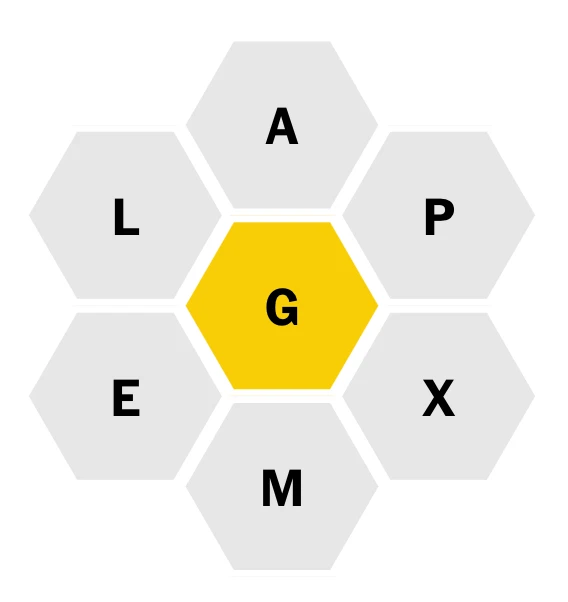
>
>Spelling Bee screenshot, with the required letter G, and the additional letters L, A, P, X, M and E.
>The goal is to identify as many words that meet the following criteria:
>
>The word must be at least four letters long.
>The word must include the central letter.
>The word cannot include any letter beyond the seven given letters.
>Note that letters can be repeated. For example, the words GAME and AMALGAM are both acceptable words. Four-letter words are >worth 1 point each, while five-letter words are worth 5 points, six-letter words are worth 6 points, seven-letter words are >worth 7 points, etc. Words that use all of the seven letters in the honeycomb are known as “pangrams” and earn 7 bonus points >(in addition to the points for the length of the word). So in the above example, MEGAPLEX is worth 15 points.
>
>Which seven-letter honeycomb results in the highest possible game score? To be a valid choice of seven letters, no letter can >be repeated, it must not contain the letter S (that would be too easy) and there must be at least one pangram.

## Solution:

In [1]:
file = open(r'english_words.txt', 'r')
vocab = file.read().splitlines()
print('Total number of words in the dictionary: ', len(vocab))

Total number of words in the dictionary:  172820


In [2]:
small_vocab = [word 
    for word in vocab 
        if 's' not in word and len(word) >= 4 and len(set(word)) <= 7]
len(small_vocab)

44585

We know that the honeycomb must contain a pangram and it does not contain the letter 's'. We can therefore reduce the size of the problem by only keeping possible pangrams. Some of the seven letter word combinations are going to be repeats, so we'll take the set afterwards

In [3]:
# filter out any combinations that contain the letter 's' and 
# contain more than 8 unique letters 
possible_pangrams = [''.join(sorted(set(word)))
    for word in vocab if 's' not in word and len(set(word)) == 7]

# filter out any repeated letter combinations
unique_pangrams = set(possible_pangrams)

print('Possible pangrams: {0}; Unique pangrams: {1}'.format(len(possible_pangrams), len(unique_pangrams)))

Possible pangrams: 14741; Unique pangrams: 7986


We can now use the potential pangrams for making specific honeycomb combinations by using each letter from the pangram as the center of honeycomb

In [4]:
# Make all the possible honeycomb combinations
possible_honeycombs = [(pangram, middle_letter) 
    for pangram in unique_pangrams for middle_letter in pangram]
len(possible_honeycombs)

55902

In [5]:
# Function to get all the possible word combinations given a honeycomb and a vocabulary
def get_valid_word_combos(honeycomb, word_list):
    pangram, middle_letter = honeycomb
    
    # only keep words that have the middle letter in them
    possible_words = set([word for word in word_list if middle_letter in word])

    # filter out words that do not contain letters from the pangram
    possible_combos = set([word for word in possible_words if all(l in pangram for l in word)])
    
    return possible_combos

In [6]:
# Function to get a score for the honeycomb given all the possible word combinations
def get_honeycomb_score(pangram, word_combos):
    score = []
    for word in word_combos :
        if len(word) == 4:
            score.append(1)
        elif len(set(word)) == 7 and all(l in pangram for l in word):
            score.append(len(word)+7)
        else:
            score.append(len(word))
    return sum(score)

Estimate time for a 1000 possible honeycombs

In [7]:
%%time 

max_score = 0
for i, honeycomb in enumerate(possible_honeycombs[:1000]):
    pangram, middle_letter = honeycomb
    possible_words = get_valid_word_combos(honeycomb, small_vocab)
    score = get_honeycomb_score(pangram, possible_words)
    if score > max_score:
        max_score = score
        best_honeycomb = honeycomb

print('Best honeycomb is {0} with a score of {1}'.format(best_honeycomb, max_score))

Best honeycomb is ('adehnrt', 'e') with a score of 2240
Wall time: 9.4 s


In [13]:
(9.4 * 55902/1000)/60 

8.757980000000002

It would take about 9 minutes to calculate scores for 55,902 honeycombs.  One way to make this faster is to discount letters that are not used heavily in English.  Letters like X, Z, Q would fit the bill.  

In order to do this, rather than estimating scores for each honeycomb by using the middle letter restriction, if the score without the restriction are not higher than the current max score, than we can just skip it and keep going.  This should increase speed because it would be only one pass rather than seven passes with each letter as the center

In [9]:
# Function to get word scores without the middle letter restriction
def get_all_word_combos(pangram, word_list):
    return [word for word in word_list if all(l in pangram for l in word)]

print(possible_honeycombs[0], get_all_word_combos(possible_honeycombs[0][0], small_vocab))

('dgintuy', 'd') ['didy', 'digging', 'digit', 'dignity', 'ding', 'dinging', 'dingy', 'dining', 'dinning', 'dint', 'dinting', 'ditty', 'duddy', 'duding', 'duit', 'dung', 'dunging', 'dungy', 'dunning', 'dunt', 'dunting', 'duty', 'dying', 'giddy', 'giddying', 'gigging', 'ginning', 'ginny', 'gittin', 'guid', 'guiding', 'guitguit', 'gunning', 'gunny', 'gutting', 'gutty', 'guying', 'igniting', 'indign', 'indignity', 'inditing', 'induing', 'inning', 'inti', 'intuit', 'intuiting', 'nidi', 'niding', 'ninny', 'nitid', 'nitty', 'nudging', 'nudity', 'nutting', 'nutty', 'tiding', 'tidy', 'tidying', 'ting', 'tinging', 'tining', 'tinning', 'tinny', 'tint', 'tinting', 'tiny', 'titi', 'titty', 'tugging', 'tung', 'tuning', 'tunning', 'tunny', 'tutti', 'tutting', 'tutty', 'tutu', 'tying', 'tyning', 'undid', 'undy', 'undying', 'unit', 'uniting', 'unity', 'untidy', 'untidying', 'untuning', 'untying']


In [10]:
%%time

# Keep track of current max score
max_score = 0
i = 0
while i < len(possible_honeycombs[:1000]):
    current_pangram = possible_honeycombs[i][0]
    fake_score = get_honeycomb_score(
        current_pangram, get_all_word_combos(
            current_pangram, small_vocab))
   
    if fake_score > max_score:
        j = 0
        while j < 7:
            current_honeycomb = possible_honeycombs[i]
            # Only calculate valid score for the honeycomb in the fake score > max score
            possible_words = get_valid_word_combos(current_honeycomb, small_vocab)
            score = (get_honeycomb_score(current_honeycomb[0], possible_words))
            j += 1
            i += 1
            if score > max_score:
                max_score = score
                best_honeycomb = current_honeycomb
    if fake_score <= max_score:
        i += 7

print('Best honeycomb is {0} with a score of {1}'.format(best_honeycomb, max_score))

Best honeycomb is ('adehnrt', 'e') with a score of 2240
Wall time: 3.53 s


Same result, but this implementation is ~3x faster than the previous one

In [11]:
%%time

# Keep track of current max score
max_score = 0
i = 0
while i < len(possible_honeycombs):
    if i % 1000 == 0:
        print('On honeycomb {0} out of {1}'.format(i, len(possible_honeycombs)))
    
    current_pangram = possible_honeycombs[i][0]
    fake_score = get_honeycomb_score(
        current_pangram, get_all_word_combos(
            current_pangram, small_vocab))
   
    if fake_score > max_score:
        j = 0
        while j < 7:
            current_honeycomb = possible_honeycombs[i]
            # Only calculate valid score for the honeycomb in the fake score > max score
            possible_words = get_valid_word_combos(current_honeycomb, small_vocab)
            score = (get_honeycomb_score(current_honeycomb[0], possible_words))
            j += 1
            i += 1
            if score > max_score:
                max_score = score
                best_honeycomb = current_honeycomb
    if fake_score <= max_score:
        i += 7

print('Best honeycomb is {0} with a score of {1}'.format(best_honeycomb, max_score))

On honeycomb 0 out of 55902
On honeycomb 7000 out of 55902
On honeycomb 14000 out of 55902
On honeycomb 21000 out of 55902
On honeycomb 28000 out of 55902
On honeycomb 35000 out of 55902
On honeycomb 42000 out of 55902
On honeycomb 49000 out of 55902
Best honeycomb is ('aeginrt', 'r') with a score of 3898
Wall time: 2min 34s


In [12]:
print('All the possible word combinations for the best honeycomb are: \n', 
      get_valid_word_combos(best_honeycomb, small_vocab))

All the possible word combinations for the best honeycomb are: 
 {'genera', 'retargeting', 'attrite', 'granite', 'iterate', 'grig', 'angaria', 'entree', 'ariette', 'antiair', 'great', 'terrier', 'rating', 'nittier', 'grant', 'nigger', 'rennin', 'reignite', 'ingratiating', 'inertiae', 'garnet', 'tetra', 'titre', 'regranting', 'enrage', 'earring', 'entreat', 'tinter', 'grannie', 'retinting', 'tergite', 'greeting', 'tier', 'retiarii', 'anear', 'garret', 'reaggregating', 'intrant', 'tarter', 'itinerating', 'treat', 'ratter', 'retine', 'reaggregate', 'teetering', 'tarrier', 'gratinee', 'rigging', 'retagging', 'gratine', 'tattier', 'regnant', 'gagger', 'grange', 'greeing', 'graining', 'irritate', 'titterer', 'reinter', 'earing', 'retint', 'entrain', 'irritating', 'gnattier', 'egger', 'arraign', 'arenite', 'reattain', 'attiring', 'train', 'titrating', 'tangier', 'rentier', 'nattering', 'enterer', 'regenerate', 'terreen', 'tare', 'arraigning', 'riata', 'grana', 'granting', 'regrating', 'retia'